In [1]:
import os
import sys

In [2]:
sys.path

['/usr/lib/python39.zip',
 '/usr/lib/python3.9',
 '/usr/lib/python3.9/lib-dynload',
 '',
 '/mnt/c/Users/crulis/Documents/projects/yolo_tdid_github/venv/lib/python3.9/site-packages']

In [2]:
sys.path.append('..')

In [3]:
from models.yolow.utils import get_yolow_clip, get_clip_encoders

In [4]:
import torch

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
img_enc, txt_enc = get_clip_encoders(True, device=device)
txt_enc.eval()
img_enc.eval()

ClipImgEncoder(
  (model): CLIP(
    (visual): VisionTransformer(
      (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
      (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (transformer): Transformer(
        (resblocks): Sequential(
          (0): ResidualAttentionBlock(
            (attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
            )
            (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (mlp): Sequential(
              (c_fc): Linear(in_features=768, out_features=3072, bias=True)
              (gelu): QuickGELU()
              (c_proj): Linear(in_features=3072, out_features=768, bias=True)
            )
            (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          )
          (1): ResidualAttentionBlock(
            (attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantiz

In [8]:
test_emb = txt_enc("test")

In [9]:
test_emb.shape

torch.Size([1, 512])

In [10]:
### Imagenet Classes

In [11]:
imagenet_classes_raw = """tench, Tinca tinca
goldfish, Carassius auratus
great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias
tiger shark, Galeocerdo cuvieri
hammerhead, hammerhead shark
electric ray, crampfish, numbfish, torpedo
stingray
cock
hen
ostrich, Struthio camelus
brambling, Fringilla montifringilla
goldfinch, Carduelis carduelis
house finch, linnet, Carpodacus mexicanus
junco, snowbird
indigo bunting, indigo finch, indigo bird, Passerina cyanea
robin, American robin, Turdus migratorius
bulbul
jay
magpie
chickadee
water ouzel, dipper
kite
bald eagle, American eagle, Haliaeetus leucocephalus
vulture
great grey owl, great gray owl, Strix nebulosa
European fire salamander, Salamandra salamandra
common newt, Triturus vulgaris
eft
spotted salamander, Ambystoma maculatum
axolotl, mud puppy, Ambystoma mexicanum
bullfrog, Rana catesbeiana
tree frog, tree-frog
tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui
loggerhead, loggerhead turtle, Caretta caretta
leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea
mud turtle
terrapin
box turtle, box tortoise
banded gecko
common iguana, iguana, Iguana iguana
American chameleon, anole, Anolis carolinensis
whiptail, whiptail lizard
agama
frilled lizard, Chlamydosaurus kingi
alligator lizard
Gila monster, Heloderma suspectum
green lizard, Lacerta viridis
African chameleon, Chamaeleo chamaeleon
Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis
African crocodile, Nile crocodile, Crocodylus niloticus
American alligator, Alligator mississipiensis
triceratops
thunder snake, worm snake, Carphophis amoenus
ringneck snake, ring-necked snake, ring snake
hognose snake, puff adder, sand viper
green snake, grass snake
king snake, kingsnake
garter snake, grass snake
water snake
vine snake
night snake, Hypsiglena torquata
boa constrictor, Constrictor constrictor
rock python, rock snake, Python sebae
Indian cobra, Naja naja
green mamba
sea snake
horned viper, cerastes, sand viper, horned asp, Cerastes cornutus
diamondback, diamondback rattlesnake, Crotalus adamanteus
sidewinder, horned rattlesnake, Crotalus cerastes
trilobite
harvestman, daddy longlegs, Phalangium opilio
scorpion
black and gold garden spider, Argiope aurantia
barn spider, Araneus cavaticus
garden spider, Aranea diademata
black widow, Latrodectus mactans
tarantula
wolf spider, hunting spider
tick
centipede
black grouse
ptarmigan
ruffed grouse, partridge, Bonasa umbellus
prairie chicken, prairie grouse, prairie fowl
peacock
quail
partridge
African grey, African gray, Psittacus erithacus
macaw
sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita
lorikeet
coucal
bee eater
hornbill
hummingbird
jacamar
toucan
drake
red-breasted merganser, Mergus serrator
goose
black swan, Cygnus atratus
tusker
echidna, spiny anteater, anteater
platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus
wallaby, brush kangaroo
koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus
wombat
jellyfish
sea anemone, anemone
brain coral
flatworm, platyhelminth
nematode, nematode worm, roundworm
conch
snail
slug
sea slug, nudibranch
chiton, coat-of-mail shell, sea cradle, polyplacophore
chambered nautilus, pearly nautilus, nautilus
Dungeness crab, Cancer magister
rock crab, Cancer irroratus
fiddler crab
king crab, Alaska crab, Alaskan king crab, Alaska king crab, Paralithodes camtschatica
American lobster, Northern lobster, Maine lobster, Homarus americanus
spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish
crayfish, crawfish, crawdad, crawdaddy
hermit crab
isopod
white stork, Ciconia ciconia
black stork, Ciconia nigra
spoonbill
flamingo
little blue heron, Egretta caerulea
American egret, great white heron, Egretta albus
bittern
crane
limpkin, Aramus pictus
European gallinule, Porphyrio porphyrio
American coot, marsh hen, mud hen, water hen, Fulica americana
bustard
ruddy turnstone, Arenaria interpres
red-backed sandpiper, dunlin, Erolia alpina
redshank, Tringa totanus
dowitcher
oystercatcher, oyster catcher
pelican
king penguin, Aptenodytes patagonica
albatross, mollymawk
grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus
killer whale, killer, orca, grampus, sea wolf, Orcinus orca
dugong, Dugong dugon
sea lion
Chihuahua
Japanese spaniel
Maltese dog, Maltese terrier, Maltese
Pekinese, Pekingese, Peke
Shih-Tzu
Blenheim spaniel
papillon
toy terrier
Rhodesian ridgeback
Afghan hound, Afghan
basset, basset hound
beagle
bloodhound, sleuthhound
bluetick
black-and-tan coonhound
Walker hound, Walker foxhound
English foxhound
redbone
borzoi, Russian wolfhound
Irish wolfhound
Italian greyhound
whippet
Ibizan hound, Ibizan Podenco
Norwegian elkhound, elkhound
otterhound, otter hound
Saluki, gazelle hound
Scottish deerhound, deerhound
Weimaraner
Staffordshire bullterrier, Staffordshire bull terrier
American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier
Bedlington terrier
Border terrier
Kerry blue terrier
Irish terrier
Norfolk terrier
Norwich terrier
Yorkshire terrier
wire-haired fox terrier
Lakeland terrier
Sealyham terrier, Sealyham
Airedale, Airedale terrier
cairn, cairn terrier
Australian terrier
Dandie Dinmont, Dandie Dinmont terrier
Boston bull, Boston terrier
miniature schnauzer
giant schnauzer
standard schnauzer
Scotch terrier, Scottish terrier, Scottie
Tibetan terrier, chrysanthemum dog
silky terrier, Sydney silky
soft-coated wheaten terrier
West Highland white terrier
Lhasa, Lhasa apso
flat-coated retriever
curly-coated retriever
golden retriever
Labrador retriever
Chesapeake Bay retriever
German short-haired pointer
vizsla, Hungarian pointer
English setter
Irish setter, red setter
Gordon setter
Brittany spaniel
clumber, clumber spaniel
English springer, English springer spaniel
Welsh springer spaniel
cocker spaniel, English cocker spaniel, cocker
Sussex spaniel
Irish water spaniel
kuvasz
schipperke
groenendael
malinois
briard
kelpie
komondor
Old English sheepdog, bobtail
Shetland sheepdog, Shetland sheep dog, Shetland
collie
Border collie
Bouvier des Flandres, Bouviers des Flandres
Rottweiler
German shepherd, German shepherd dog, German police dog, alsatian
Doberman, Doberman pinscher
miniature pinscher
Greater Swiss Mountain dog
Bernese mountain dog
Appenzeller
EntleBucher
boxer
bull mastiff
Tibetan mastiff
French bulldog
Great Dane
Saint Bernard, St Bernard
Eskimo dog, husky
malamute, malemute, Alaskan malamute
Siberian husky
dalmatian, coach dog, carriage dog
affenpinscher, monkey pinscher, monkey dog
basenji
pug, pug-dog
Leonberg
Newfoundland, Newfoundland dog
Great Pyrenees
Samoyed, Samoyede
Pomeranian
chow, chow chow
keeshond
Brabancon griffon
Pembroke, Pembroke Welsh corgi
Cardigan, Cardigan Welsh corgi
toy poodle
miniature poodle
standard poodle
Mexican hairless
timber wolf, grey wolf, gray wolf, Canis lupus
white wolf, Arctic wolf, Canis lupus tundrarum
red wolf, maned wolf, Canis rufus, Canis niger
coyote, prairie wolf, brush wolf, Canis latrans
dingo, warrigal, warragal, Canis dingo
dhole, Cuon alpinus
African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus
hyena, hyaena
red fox, Vulpes vulpes
kit fox, Vulpes macrotis
Arctic fox, white fox, Alopex lagopus
grey fox, gray fox, Urocyon cinereoargenteus
tabby, tabby cat
tiger cat
Persian cat
Siamese cat, Siamese
Egyptian cat
cougar, puma, catamount, mountain lion, painter, panther, Felis concolor
lynx, catamount
leopard, Panthera pardus
snow leopard, ounce, Panthera uncia
jaguar, panther, Panthera onca, Felis onca
lion, king of beasts, Panthera leo
tiger, Panthera tigris
cheetah, chetah, Acinonyx jubatus
brown bear, bruin, Ursus arctos
American black bear, black bear, Ursus americanus, Euarctos americanus
ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus
sloth bear, Melursus ursinus, Ursus ursinus
mongoose
meerkat, mierkat
tiger beetle
ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle
ground beetle, carabid beetle
long-horned beetle, longicorn, longicorn beetle
leaf beetle, chrysomelid
dung beetle
rhinoceros beetle
weevil
fly
bee
ant, emmet, pismire
grasshopper, hopper
cricket
walking stick, walkingstick, stick insect
cockroach, roach
mantis, mantid
cicada, cicala
leafhopper
lacewing, lacewing fly
dragonfly, darning needle, devil's darning needle, sewing needle, snake feeder, snake doctor, mosquito hawk, skeeter hawk
damselfly
admiral
ringlet, ringlet butterfly
monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
cabbage butterfly
sulphur butterfly, sulfur butterfly
lycaenid, lycaenid butterfly
starfish, sea star
sea urchin
sea cucumber, holothurian
wood rabbit, cottontail, cottontail rabbit
hare
Angora, Angora rabbit
hamster
porcupine, hedgehog
fox squirrel, eastern fox squirrel, Sciurus niger
marmot
beaver
guinea pig, Cavia cobaya
sorrel
zebra
hog, pig, grunter, squealer, Sus scrofa
wild boar, boar, Sus scrofa
warthog
hippopotamus, hippo, river horse, Hippopotamus amphibius
ox
water buffalo, water ox, Asiatic buffalo, Bubalus bubalis
bison
ram, tup
bighorn, bighorn sheep, cimarron, Rocky Mountain bighorn, Rocky Mountain sheep, Ovis canadensis
ibex, Capra ibex
hartebeest
impala, Aepyceros melampus
gazelle
Arabian camel, dromedary, Camelus dromedarius
llama
weasel
mink
polecat, fitch, foulmart, foumart, Mustela putorius
black-footed ferret, ferret, Mustela nigripes
otter
skunk, polecat, wood pussy
badger
armadillo
three-toed sloth, ai, Bradypus tridactylus
orangutan, orang, orangutang, Pongo pygmaeus
gorilla, Gorilla gorilla
chimpanzee, chimp, Pan troglodytes
gibbon, Hylobates lar
siamang, Hylobates syndactylus, Symphalangus syndactylus
guenon, guenon monkey
patas, hussar monkey, Erythrocebus patas
baboon
macaque
langur
colobus, colobus monkey
proboscis monkey, Nasalis larvatus
marmoset
capuchin, ringtail, Cebus capucinus
howler monkey, howler
titi, titi monkey
spider monkey, Ateles geoffroyi
squirrel monkey, Saimiri sciureus
Madagascar cat, ring-tailed lemur, Lemur catta
indri, indris, Indri indri, Indri brevicaudatus
Indian elephant, Elephas maximus
African elephant, Loxodonta africana
lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens
giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca
barracouta, snoek
eel
coho, cohoe, coho salmon, blue jack, silver salmon, Oncorhynchus kisutch
rock beauty, Holocanthus tricolor
anemone fish
sturgeon
gar, garfish, garpike, billfish, Lepisosteus osseus
lionfish
puffer, pufferfish, blowfish, globefish
abacus
abaya
academic gown, academic robe, judge's robe
accordion, piano accordion, squeeze box
acoustic guitar
aircraft carrier, carrier, flattop, attack aircraft carrier
airliner
airship, dirigible
altar
ambulance
amphibian, amphibious vehicle
analog clock
apiary, bee house
apron
ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin
assault rifle, assault gun
backpack, back pack, knapsack, packsack, rucksack, haversack
bakery, bakeshop, bakehouse
balance beam, beam
balloon
ballpoint, ballpoint pen, ballpen, Biro
Band Aid
banjo
bannister, banister, balustrade, balusters, handrail
barbell
barber chair
barbershop
barn
barometer
barrel, cask
barrow, garden cart, lawn cart, wheelbarrow
baseball
basketball
bassinet
bassoon
bathing cap, swimming cap
bath towel
bathtub, bathing tub, bath, tub
beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon
beacon, lighthouse, beacon light, pharos
beaker
bearskin, busby, shako
beer bottle
beer glass
bell cote, bell cot
bib
bicycle-built-for-two, tandem bicycle, tandem
bikini, two-piece
binder, ring-binder
binoculars, field glasses, opera glasses
birdhouse
boathouse
bobsled, bobsleigh, bob
bolo tie, bolo, bola tie, bola
bonnet, poke bonnet
bookcase
bookshop, bookstore, bookstall
bottlecap
bow
bow tie, bow-tie, bowtie
brass, memorial tablet, plaque
brassiere, bra, bandeau
breakwater, groin, groyne, mole, bulwark, seawall, jetty
breastplate, aegis, egis
broom
bucket, pail
buckle
bulletproof vest
bullet train, bullet
butcher shop, meat market
cab, hack, taxi, taxicab
caldron, cauldron
candle, taper, wax light
cannon
canoe
can opener, tin opener
cardigan
car mirror
carousel, carrousel, merry-go-round, roundabout, whirligig
carpenter's kit, tool kit
carton
car wheel
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
cassette
cassette player
castle
catamaran
CD player
cello, violoncello
cellular telephone, cellular phone, cellphone, cell, mobile phone
chain
chainlink fence
chain mail, ring mail, mail, chain armor, chain armour, ring armor, ring armour
chain saw, chainsaw
chest
chiffonier, commode
chime, bell, gong
china cabinet, china closet
Christmas stocking
church, church building
cinema, movie theater, movie theatre, movie house, picture palace
cleaver, meat cleaver, chopper
cliff dwelling
cloak
clog, geta, patten, sabot
cocktail shaker
coffee mug
coffeepot
coil, spiral, volute, whorl, helix
combination lock
computer keyboard, keypad
confectionery, confectionary, candy store
container ship, containership, container vessel
convertible
corkscrew, bottle screw
cornet, horn, trumpet, trump
cowboy boot
cowboy hat, ten-gallon hat
cradle
crane
crash helmet
crate
crib, cot
Crock Pot
croquet ball
crutch
cuirass
dam, dike, dyke
desk
desktop computer
dial telephone, dial phone
diaper, nappy, napkin
digital clock
digital watch
dining table, board
dishrag, dishcloth
dishwasher, dish washer, dishwashing machine
disk brake, disc brake
dock, dockage, docking facility
dogsled, dog sled, dog sleigh
dome
doormat, welcome mat
drilling platform, offshore rig
drum, membranophone, tympan
drumstick
dumbbell
Dutch oven
electric fan, blower
electric guitar
electric locomotive
entertainment center
envelope
espresso maker
face powder
feather boa, boa
file, file cabinet, filing cabinet
fireboat
fire engine, fire truck
fire screen, fireguard
flagpole, flagstaff
flute, transverse flute
folding chair
football helmet
forklift
fountain
fountain pen
four-poster
freight car
French horn, horn
frying pan, frypan, skillet
fur coat
garbage truck, dustcart
gasmask, respirator, gas helmet
gas pump, gasoline pump, petrol pump, island dispenser
goblet
go-kart
golf ball
golfcart, golf cart
gondola
gong, tam-tam
gown
grand piano, grand
greenhouse, nursery, glasshouse
grille, radiator grille
grocery store, grocery, food market, market
guillotine
hair slide
hair spray
half track
hammer
hamper
hand blower, blow dryer, blow drier, hair dryer, hair drier
hand-held computer, hand-held microcomputer
handkerchief, hankie, hanky, hankey
hard disc, hard disk, fixed disk
harmonica, mouth organ, harp, mouth harp
harp
harvester, reaper
hatchet
holster
home theater, home theatre
honeycomb
hook, claw
hoopskirt, crinoline
horizontal bar, high bar
horse cart, horse-cart
hourglass
iPod
iron, smoothing iron
jack-o'-lantern
jean, blue jean, denim
jeep, landrover
jersey, T-shirt, tee shirt
jigsaw puzzle
jinrikisha, ricksha, rickshaw
joystick
kimono
knee pad
knot
lab coat, laboratory coat
ladle
lampshade, lamp shade
laptop, laptop computer
lawn mower, mower
lens cap, lens cover
letter opener, paper knife, paperknife
library
lifeboat
lighter, light, igniter, ignitor
limousine, limo
liner, ocean liner
lipstick, lip rouge
Loafer
lotion
loudspeaker, speaker, speaker unit, loudspeaker system, speaker system
loupe, jeweler's loupe
lumbermill, sawmill
magnetic compass
mailbag, postbag
mailbox, letter box
maillot
maillot, tank suit
manhole cover
maraca
marimba, xylophone
mask
matchstick
maypole
maze, labyrinth
measuring cup
medicine chest, medicine cabinet
megalith, megalithic structure
microphone, mike
microwave, microwave oven
military uniform
milk can
minibus
miniskirt, mini
minivan
missile
mitten
mixing bowl
mobile home, manufactured home
Model T
modem
monastery
monitor
moped
mortar
mortarboard
mosque
mosquito net
motor scooter, scooter
mountain bike, all-terrain bike, off-roader
mountain tent
mouse, computer mouse
mousetrap
moving van
muzzle
nail
neck brace
necklace
nipple
notebook, notebook computer
obelisk
oboe, hautboy, hautbois
ocarina, sweet potato
odometer, hodometer, mileometer, milometer
oil filter
organ, pipe organ
oscilloscope, scope, cathode-ray oscilloscope, CRO
overskirt
oxcart
oxygen mask
packet
paddle, boat paddle
paddlewheel, paddle wheel
padlock
paintbrush
pajama, pyjama, pj's, jammies
palace
panpipe, pandean pipe, syrinx
paper towel
parachute, chute
parallel bars, bars
park bench
parking meter
passenger car, coach, carriage
patio, terrace
pay-phone, pay-station
pedestal, plinth, footstall
pencil box, pencil case
pencil sharpener
perfume, essence
Petri dish
photocopier
pick, plectrum, plectron
pickelhaube
picket fence, paling
pickup, pickup truck
pier
piggy bank, penny bank
pill bottle
pillow
ping-pong ball
pinwheel
pirate, pirate ship
pitcher, ewer
plane, carpenter's plane, woodworking plane
planetarium
plastic bag
plate rack
plow, plough
plunger, plumber's helper
Polaroid camera, Polaroid Land camera
pole
police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria
poncho
pool table, billiard table, snooker table
pop bottle, soda bottle
pot, flowerpot
potter's wheel
power drill
prayer rug, prayer mat
printer
prison, prison house
projectile, missile
projector
puck, hockey puck
punching bag, punch bag, punching ball, punchball
purse
quill, quill pen
quilt, comforter, comfort, puff
racer, race car, racing car
racket, racquet
radiator
radio, wireless
radio telescope, radio reflector
rain barrel
recreational vehicle, RV, R.V.
reel
reflex camera
refrigerator, icebox
remote control, remote
restaurant, eating house, eating place, eatery
revolver, six-gun, six-shooter
rifle
rocking chair, rocker
rotisserie
rubber eraser, rubber, pencil eraser
rugby ball
rule, ruler
running shoe
safe
safety pin
saltshaker, salt shaker
sandal
sarong
sax, saxophone
scabbard
scale, weighing machine
school bus
schooner
scoreboard
screen, CRT screen
screw
screwdriver
seat belt, seatbelt
sewing machine
shield, buckler
shoe shop, shoe-shop, shoe store
shoji
shopping basket
shopping cart
shovel
shower cap
shower curtain
ski
ski mask
sleeping bag
slide rule, slipstick
sliding door
slot, one-armed bandit
snorkel
snowmobile
snowplow, snowplough
soap dispenser
soccer ball
sock
solar dish, solar collector, solar furnace
sombrero
soup bowl
space bar
space heater
space shuttle
spatula
speedboat
spider web, spider's web
spindle
sports car, sport car
spotlight, spot
stage
steam locomotive
steel arch bridge
steel drum
stethoscope
stole
stone wall
stopwatch, stop watch
stove
strainer
streetcar, tram, tramcar, trolley, trolley car
stretcher
studio couch, day bed
stupa, tope
submarine, pigboat, sub, U-boat
suit, suit of clothes
sundial
sunglass
sunglasses, dark glasses, shades
sunscreen, sunblock, sun blocker
suspension bridge
swab, swob, mop
sweatshirt
swimming trunks, bathing trunks
swing
switch, electric switch, electrical switch
syringe
table lamp
tank, army tank, armored combat vehicle, armoured combat vehicle
tape player
teapot
teddy, teddy bear
television, television system
tennis ball
thatch, thatched roof
theater curtain, theatre curtain
thimble
thresher, thrasher, threshing machine
throne
tile roof
toaster
tobacco shop, tobacconist shop, tobacconist
toilet seat
torch
totem pole
tow truck, tow car, wrecker
toyshop
tractor
trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi
tray
trench coat
tricycle, trike, velocipede
trimaran
tripod
triumphal arch
trolleybus, trolley coach, trackless trolley
trombone
tub, vat
turnstile
typewriter keyboard
umbrella
unicycle, monocycle
upright, upright piano
vacuum, vacuum cleaner
vase
vault
velvet
vending machine
vestment
viaduct
violin, fiddle
volleyball
waffle iron
wall clock
wallet, billfold, notecase, pocketbook
wardrobe, closet, press
warplane, military plane
washbasin, handbasin, washbowl, lavabo, wash-hand basin
washer, automatic washer, washing machine
water bottle
water jug
water tower
whiskey jug
whistle
wig
window screen
window shade
Windsor tie
wine bottle
wing
wok
wooden spoon
wool, woolen, woollen
worm fence, snake fence, snake-rail fence, Virginia fence
wreck
yawl
yurt
web site, website, internet site, site
comic book
crossword puzzle, crossword
street sign
traffic light, traffic signal, stoplight
book jacket, dust cover, dust jacket, dust wrapper
menu
plate
guacamole
consomme
hot pot, hotpot
trifle
ice cream, icecream
ice lolly, lolly, lollipop, popsicle
French loaf
bagel, beigel
pretzel
cheeseburger
hotdog, hot dog, red hot
mashed potato
head cabbage
broccoli
cauliflower
zucchini, courgette
spaghetti squash
acorn squash
butternut squash
cucumber, cuke
artichoke, globe artichoke
bell pepper
cardoon
mushroom
Granny Smith
strawberry
orange
lemon
fig
pineapple, ananas
banana
jackfruit, jak, jack
custard apple
pomegranate
hay
carbonara
chocolate sauce, chocolate syrup
dough
meat loaf, meatloaf
pizza, pizza pie
potpie
burrito
red wine
espresso
cup
eggnog
alp
bubble
cliff, drop, drop-off
coral reef
geyser
lakeside, lakeshore
promontory, headland, head, foreland
sandbar, sand bar
seashore, coast, seacoast, sea-coast
valley, vale
volcano
ballplayer, baseball player
groom, bridegroom
scuba diver
rapeseed
daisy
yellow lady's slipper, yellow lady-slipper, Cypripedium calceolus, Cypripedium parviflorum
corn
acorn
hip, rose hip, rosehip
buckeye, horse chestnut, conker
coral fungus
agaric
gyromitra
stinkhorn, carrion fungus
earthstar
hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa
bolete
ear, spike, capitulum
toilet tissue, toilet paper, bathroom tissue
"""

In [12]:
classes = [x for y in imagenet_classes_raw.split("\n") for x in y.split(", ")] # synonyms are flattened
# classes = imagenet_classes_raw.split("\n")

In [13]:
len(classes)

1861

In [7]:
embeddings = []

In [15]:
with torch.inference_mode():
    for i in range(len(embeddings), len(classes)):
        emb = txt_enc(classes[i])
        embeddings.append(emb)

KeyboardInterrupt: 

# GQA

In [20]:
import json
from pathlib import Path
from textblob import TextBlob

In [10]:
GQA_graph_filepath = Path("/mnt/c/data/datasets/GQA/train_sceneGraphs.json")

with open(GQA_graph_filepath, mode="r") as f:
    graph_json = json.load(f)

In [27]:
GQA_classes = []
for img, v in graph_json.items():
    for ob, v2 in v["objects"].items():
        GQA_classes.append(v2["name"])

In [28]:
GQA_classes = sorted(set(GQA_classes))
len(GQA_classes)

1702

In [29]:

GQA_classes = [" ".join(y.singularize() for y in TextBlob(x).words) for x in GQA_classes]
GQA_classes = sorted(set(GQA_classes))

In [30]:
len(GQA_classes)

1324

In [31]:
GQA_classes

['accessory',
 'action figure',
 'air',
 'air conditioner',
 'aircraft',
 'airplane',
 'airport',
 'alarm clock',
 'alcohol',
 'alien',
 'alligator',
 'almond',
 'ambulance',
 'american flag',
 'amusement park',
 'anchovy',
 'angry bird',
 'animal',
 'antelope',
 'antenna',
 'apartment',
 'apartment building',
 'appetizer',
 'apple',
 'apple logo',
 'appliance',
 'apron',
 'aquarium',
 'arm',
 'armchair',
 'armor',
 'arrow',
 'artichoke',
 'artwork',
 'asparagu',
 'athlete',
 'athletic shoe',
 'attic',
 'audience',
 'auditorium',
 'avocado',
 'baby',
 'backpack',
 'backyard',
 'bacon',
 'bag',
 'bagel',
 'baked good',
 'baker',
 'bakery',
 'baking pan',
 'baking sheet',
 'balcony',
 'ball',
 'balloon',
 'banana',
 'banana bunch',
 'banana peel',
 'bandage',
 'bandana',
 'bar stool',
 'barn',
 'barrier',
 'bartender',
 'baseball',
 'baseball bat',
 'baseball mitt',
 'baseball player',
 'basil',
 'basket',
 'bat',
 'bath towel',
 'bathroom',
 'bathtub',
 'batter',
 'battery',
 'beach',
 

In [32]:
gqa_embeddings = []

In [37]:
with torch.inference_mode():
    for i in range(len(gqa_embeddings), len(GQA_classes)):
        emb = txt_enc(GQA_classes[i])
        gqa_embeddings.append(emb)

In [38]:
len(gqa_embeddings)

1324

In [39]:
gqa_embeddings = torch.cat(gqa_embeddings, axis=0).float()

In [40]:
torch.save(gqa_embeddings, 'gqa_txt_embeddings.pt')

# O365

In [41]:
o365_classes_txt = """Person
Sneakers
Chair
Other Shoes
Hat
Car
Lamp
Glasses
Bottle
Desk
Cup
Street Lights
Cabinet/shelf
Handbag/Satchel
Bracelet
Plate
Picture/Frame
Helmet
Book
Gloves
Storage box
Boat
Leather Shoes
Flower
Bench
Potted Plant
Bowl/Basin
Flag
Pillow
Boots
Vase
Microphone
Necklace
Ring
SUV
Wine Glass
Belt
Monitor/TV
Backpack
Umbrella
Traffic Light
Speaker
Watch
Tie
Trash bin Can
Slippers
Bicycle
Stool
Barrel/bucket
Van
Couch
Sandals
Basket
Drum
Pen/Pencil
Bus
Wild Bird
High Heels
Motorcycle
Guitar
Carpet
Cell Phone
Bread
Camera
Canned
Truck
Traffic cone
Cymbal
Lifesaver
Towel
Stuffed Toy
Candle
Sailboat
Laptop
Awning
Bed
Faucet
Tent
Horse
Mirror
Power outlet
Sink
Apple
Air Conditioner
Knife
Hockey Stick
Paddle
Pickup Truck
Fork
Traffic Sign
Balloon
Tripod
Dog
Spoon
Clock
Pot
Cow
Cake
Dinning Table
Sheep
Hanger
Blackboard/Whiteboard
Napkin
Other Fish
Orange/Tangerine
Toiletry
Keyboard
Tomato
Lantern
Machinery Vehicle
Fan
Green Vegetables
Banana
Baseball Glove
Airplane
Mouse
Train
Pumpkin
Soccer
Skiboard
Luggage
Nightstand
Tea pot
Telephone
Trolley
Head Phone
Sports Car
Stop Sign
Dessert
Scooter
Stroller
Crane
Remote
Refrigerator
Oven
Lemon
Duck
Baseball Bat
Surveillance Camera
Cat
Jug
Broccoli
Piano
Pizza
Elephant
Skateboard
Surfboard
Gun
Skating and Skiing shoes
Gas stove
Donut
Bow Tie
Carrot
Toilet
Kite
Strawberry
Other Balls
Shovel
Pepper
Computer Box
Toilet Paper
Cleaning Products
Chopsticks
Microwave
Pigeon
Baseball
Cutting/chopping Board
Coffee Table
Side Table
Scissors
Marker
Pie
Ladder
Snowboard
Cookies
Radiator
Fire Hydrant
Basketball
Zebra
Grape
Giraffe
Potato
Sausage
Tricycle
Violin
Egg
Fire Extinguisher
Candy
Fire Truck
Billiards
Converter
Bathtub
Wheelchair
Golf Club
Briefcase
Cucumber
Cigar/Cigarette
Paint Brush
Pear
Heavy Truck
Hamburger
Extractor
Extension Cord
Tong
Tennis Racket
Folder
American Football
earphone
Mask
Kettle
Tennis
Ship
Swing
Coffee Machine
Slide
Carriage
Onion
Green beans
Projector
Frisbee
Washing Machine/Drying Machine
Chicken
Printer
Watermelon
Saxophone
Tissue
Toothbrush
Ice cream
Hot-air balloon
Cello
French Fries
Scale
Trophy
Cabbage
Hot dog
Blender
Peach
Rice
Wallet/Purse
Volleyball
Deer
Goose
Tape
Tablet
Cosmetics
Trumpet
Pineapple
Golf Ball
Ambulance
Parking meter
Mango
Key
Hurdle
Fishing Rod
Medal
Flute
Brush
Penguin
Megaphone
Corn
Lettuce
Garlic
Swan
Helicopter
Green Onion
Sandwich
Nuts
Speed Limit Sign
Induction Cooker
Broom
Trombone
Plum
Rickshaw
Goldfish
Kiwi fruit
Router/modem
Poker Card
Toaster
Shrimp
Sushi
Cheese
Notepaper
Cherry
Pliers
CD
Pasta
Hammer
Cue
Avocado
Hamimelon
Flask
Mushroom
Screwdriver
Soap
Recorder
Bear
Eggplant
Board Eraser
Coconut
Tape Measure/Ruler
Pig
Showerhead
Globe
Chips
Steak
Crosswalk Sign
Stapler
Camel
Formula 1
Pomegranate
Dishwasher
Crab
Hoverboard
Meat ball
Rice Cooker
Tuba
Calculator
Papaya
Antelope
Parrot
Seal
Butterfly
Dumbbell
Donkey
Lion
Urinal
Dolphin
Electric Drill
Hair Dryer
Egg tart
Jellyfish
Treadmill
Lighter
Grapefruit
Game board
Mop
Radish
Baozi
Target
French
Spring Rolls
Monkey
Rabbit
Pencil Case
Yak
Red Cabbage
Binoculars
Asparagus
Barbell
Scallop
Noddles
Comb
Dumpling
Oyster
Table Tennis paddle
Cosmetics Brush/Eyeliner Pencil
Chainsaw
Eraser
Lobster
Durian
Okra
Lipstick
Cosmetics Mirror
Curling
Table Tennis"""

In [44]:
o365_classes = [x.lower() for x in o365_classes_txt.splitlines()]

In [45]:
o365_classes = sorted(set([x.lower() for x in o365_classes]))

In [46]:
len(o365_classes)

365

In [47]:
o365_classes

['air conditioner',
 'airplane',
 'ambulance',
 'american football',
 'antelope',
 'apple',
 'asparagus',
 'avocado',
 'awning',
 'backpack',
 'balloon',
 'banana',
 'baozi',
 'barbell',
 'barrel/bucket',
 'baseball',
 'baseball bat',
 'baseball glove',
 'basket',
 'basketball',
 'bathtub',
 'bear',
 'bed',
 'belt',
 'bench',
 'bicycle',
 'billiards',
 'binoculars',
 'blackboard/whiteboard',
 'blender',
 'board eraser',
 'boat',
 'book',
 'boots',
 'bottle',
 'bow tie',
 'bowl/basin',
 'bracelet',
 'bread',
 'briefcase',
 'broccoli',
 'broom',
 'brush',
 'bus',
 'butterfly',
 'cabbage',
 'cabinet/shelf',
 'cake',
 'calculator',
 'camel',
 'camera',
 'candle',
 'candy',
 'canned',
 'car',
 'carpet',
 'carriage',
 'carrot',
 'cat',
 'cd',
 'cell phone',
 'cello',
 'chainsaw',
 'chair',
 'cheese',
 'cherry',
 'chicken',
 'chips',
 'chopsticks',
 'cigar/cigarette',
 'cleaning products',
 'clock',
 'coconut',
 'coffee machine',
 'coffee table',
 'comb',
 'computer box',
 'converter',
 'cook

In [51]:
with torch.inference_mode():
    for i in range(len(embeddings), len(o365_classes)):
        emb = txt_enc(o365_classes[i])
        embeddings.append(emb)

In [52]:
len(embeddings)

365

In [53]:
embs = torch.cat(embeddings, axis=0).float()

In [54]:
embs.mean(axis=0)

tensor([-3.5049e-02, -6.5838e-02, -4.7519e-02,  6.1966e-02, -5.0939e-02, -6.5091e-03, -1.4962e-01, -9.4139e-01, -1.8636e-01,  1.9775e-01, -8.8169e-03, -7.7422e-02,  2.8590e-02, -1.0064e-01,  1.6394e-01,  1.0470e-01,  2.4731e-01,  5.4414e-02, -1.2673e-01, -1.0549e-01,  2.7254e-01,  1.0017e-01,  7.2678e-02,  1.2564e-01,
        -1.5226e-01,  7.6836e-02, -6.1325e-02,  5.0755e-02, -9.5925e-02,  1.9160e-01, -8.5539e-02, -3.7293e-02, -7.5360e-02,  5.2485e-02, -1.2886e-01,  7.7633e-02,  3.7554e-02,  1.1661e-01, -4.8643e-02, -1.5589e-02, -2.1461e-02, -3.1381e-02,  6.1339e-02, -4.9684e-02,  1.4685e-01,  2.0885e-01,  4.3027e-02,  6.8658e-02,
         9.8016e-02,  2.7523e-02, -3.7803e-02, -1.4704e-01,  6.2021e-02, -1.2707e-01, -4.6747e-02, -4.4175e-02,  7.7340e-03,  2.6447e-02, -1.8773e-01,  1.2976e-01,  1.9805e-01, -1.8095e-01,  4.5581e-02, -1.0142e-01, -9.8339e-02, -1.4672e-01, -3.1957e-02,  1.0852e-01, -8.4307e-02, -1.1501e-01,  1.0200e-01, -2.0304e-01,
        -5.3250e-04,  1.3246e-01, -3.550

In [55]:
embs.var(0)

tensor([0.0386, 0.0466, 0.0524, 0.0478, 0.0398, 0.0507, 0.0538, 0.1051, 0.0329, 0.0524, 0.0477, 0.0466, 0.0540, 0.0402, 0.0481, 0.0410, 0.0330, 0.0378, 0.0471, 0.0428, 0.0348, 0.0552, 0.0463, 0.0491, 0.0395, 0.0550, 0.0424, 0.0378, 0.0503, 0.0349, 0.0541, 0.0417, 0.0506, 0.0568, 0.0590, 0.0485, 0.0402, 0.0448, 0.0464,
        0.0189, 0.0408, 0.0449, 0.0453, 0.0562, 0.0393, 0.0137, 0.0587, 0.0408, 0.0460, 0.0458, 0.0513, 0.0504, 0.0425, 0.0536, 0.0449, 0.0504, 0.0401, 0.0406, 0.0552, 0.0516, 0.0352, 0.0400, 0.0450, 0.0450, 0.0562, 0.0490, 0.0485, 0.0402, 0.0434, 0.0443, 0.0519, 0.0448, 0.0397, 0.0499, 0.0555, 0.0394, 0.0476, 0.0435,
        0.0420, 0.0463, 0.0605, 0.0550, 0.0480, 0.0354, 0.0442, 0.0544, 0.0244, 0.0442, 0.0651, 0.0423, 0.0481, 0.0438, 0.0269, 0.0483, 0.0513, 0.0478, 0.0494, 0.0610, 0.0430, 0.0351, 0.0365, 0.0482, 0.0481, 0.0400, 0.0530, 0.0465, 0.0290, 0.0441, 0.0465, 0.0537, 0.0511, 0.0342, 0.0368, 0.0495, 0.0461, 0.0419, 0.0522,
        0.0461, 0.0547, 0.0430, 0.0466, 

In [56]:
embs.var(0).max()

tensor(0.4310)

In [57]:
torch.save(embs, '../o365_txt_embeddings.pt')

In [ ]:
with open('../tego_embeddings.pt', mode="rb") as f:
    img_embs = torch.load(f, map_location=device).float()

In [ ]:
with open('../coco_train_embeddings.pt', mode="rb") as f:
    coco_embs = torch.load(f, map_location=device).float()

In [ ]:
img_embs.shape

torch.Size([11930, 4, 512])

In [ ]:
img_embs_m = img_embs.mean(1)

In [ ]:
torch.abs(img_embs_m.var(0) - embs.var(0))

tensor([7.4180e-03, 5.5225e-03, 2.4065e-02, 9.5651e-03, 3.6130e-02, 6.3655e-03, 3.2667e-03, 7.8076e-02, 8.2000e-02, 1.4338e-02, 2.8175e-02, 5.2237e-03, 9.1120e-02, 8.3260e-03, 3.6246e-03, 5.9137e-03, 1.2490e-01, 1.2584e-02, 1.5788e-02, 8.6629e-03, 2.1796e-01, 2.9003e-03, 1.3481e-02, 2.0277e-02, 9.6427e-03, 8.5845e-03,
        5.7679e-03, 7.4286e-03, 1.5440e-02, 3.1033e-03, 2.8754e-02, 1.1448e-02, 1.5684e-02, 2.1014e-02, 4.2122e-02, 2.1258e-02, 8.8915e-03, 5.9941e-03, 6.8917e-03, 2.6779e-01, 1.4961e-03, 1.2603e-02, 3.5468e-03, 1.8419e-02, 2.0793e-02, 5.7745e-01, 1.5288e-02, 2.0831e-02, 1.1836e-02, 4.7044e-04, 4.3261e-03, 4.1774e-03,
        2.0752e-02, 1.6985e-02, 1.8312e-02, 1.5353e-02, 5.4330e-02, 1.3565e-02, 1.1559e-02, 1.2403e-02, 1.2353e-01, 1.2513e-02, 3.2683e-02, 1.8902e-02, 1.1779e-02, 1.5551e-03, 4.3814e-02, 1.1621e-01, 1.1000e-02, 4.3655e-03, 1.5300e-02, 3.4139e-03, 9.2184e-03, 2.8176e-03, 2.2208e-02, 5.1924e-03, 8.7874e-03, 1.6616e-02,
        1.3884e-02, 1.0937e-02, 1.3661e-

In [ ]:
torch.abs(img_embs_m.mean(0) - embs.mean(0))

tensor([9.6508e-02, 1.0534e-01, 4.6905e-02, 4.3900e-01, 4.5778e-01, 4.7093e-03, 1.4003e-01, 1.4763e+00, 4.5722e-01, 1.6846e-03, 2.2378e-01, 8.1392e-02, 9.3006e-02, 2.6160e-02, 1.0207e-01, 1.3571e-01, 1.5369e-01, 1.1988e-01, 8.4643e-02, 7.9637e-03, 9.4808e-01, 1.7981e-02, 3.0428e-01, 8.8729e-02, 4.5013e-02, 1.2624e-01,
        9.2100e-03, 1.2933e-01, 1.4444e-02, 5.5612e-02, 4.1041e-02, 5.4441e-01, 1.7913e-01, 1.6175e-01, 2.6449e-01, 2.2971e-03, 2.5461e-01, 4.3510e-01, 4.1147e-02, 2.9521e-01, 2.1519e-01, 1.6972e-01, 2.8557e-01, 1.5815e-02, 2.0594e-02, 4.8363e-02, 2.1680e-01, 4.7510e-02, 1.7991e-01, 1.6397e-01, 2.5045e-01, 3.1944e-01,
        1.3222e-01, 9.8136e-03, 3.7367e-02, 2.1899e-02, 2.0471e-01, 4.8313e-02, 2.7099e-01, 1.1870e-01, 3.3043e-01, 8.7958e-02, 3.4005e-02, 1.7206e-01, 6.9603e-02, 3.2550e-02, 9.0662e-02, 5.2224e-01, 6.1102e-02, 1.7881e-01, 1.8296e-01, 1.0180e-01, 2.3654e-01, 6.0572e-01, 1.0620e-01, 6.9310e-02, 5.9270e-01, 1.3279e-01,
        8.8047e-02, 1.0825e-01, 2.5200e-

In [ ]:
cov_emb = torch.cov(embs.T)

In [ ]:
cov_emb.shape

torch.Size([512, 512])

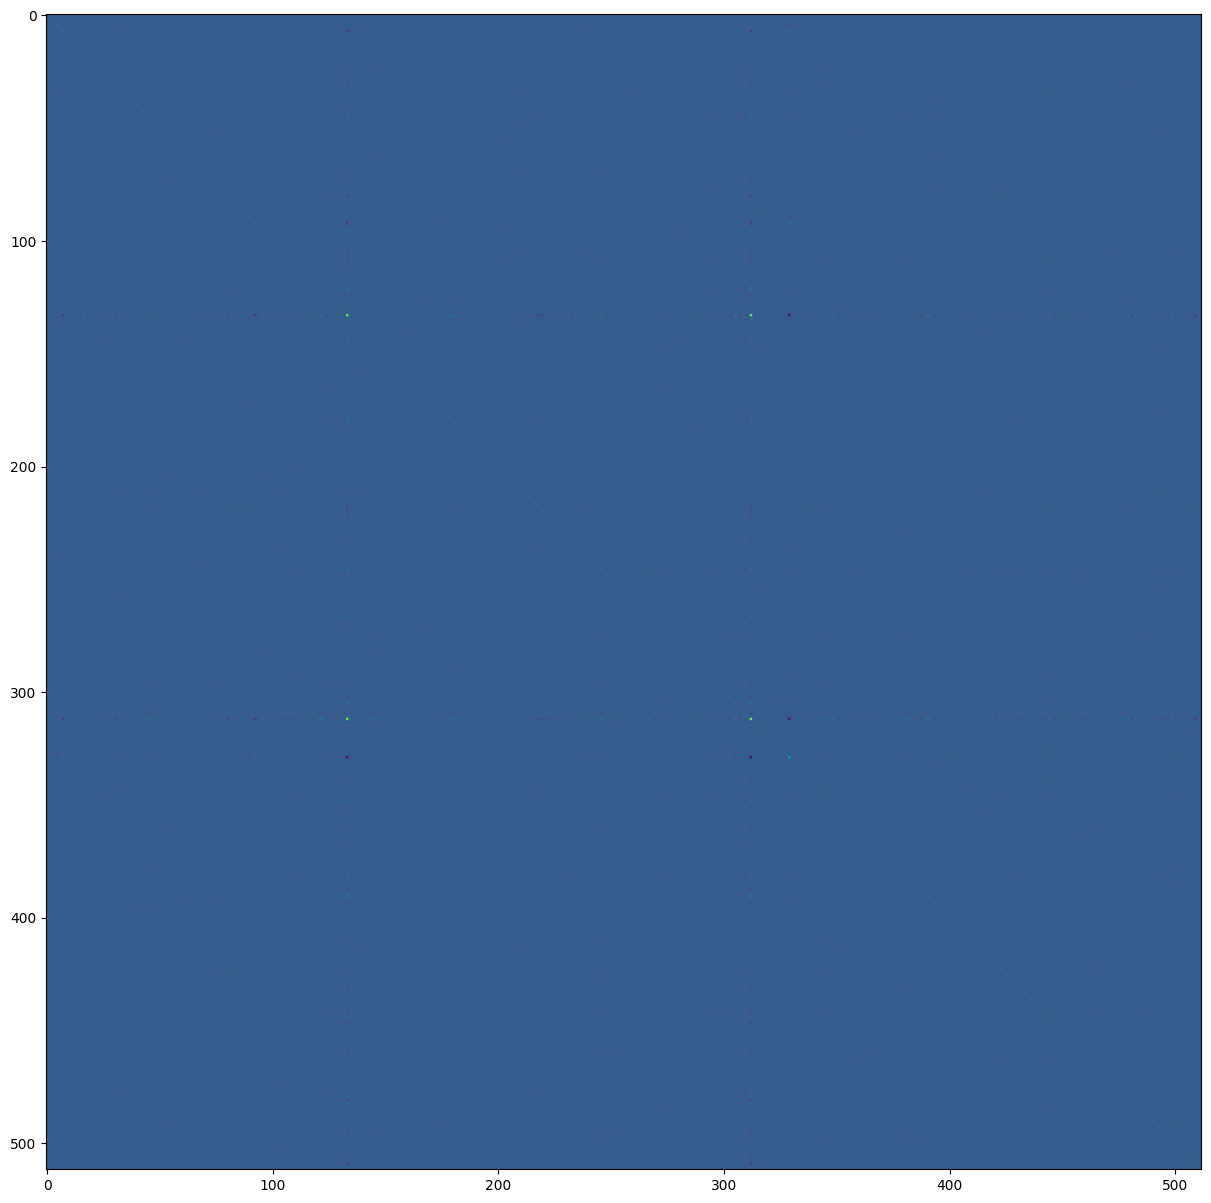

In [ ]:
from matplotlib import pyplot as plt
# display the covariance matrix
plt.figure(figsize=(15, 15))
plt.imshow(cov_emb.cpu().numpy())

In [ ]:
coco_emb_cov = torch.cov(coco_embs.T)

In [ ]:
img_emb_cov = torch.cov(img_embs_m.float().T)

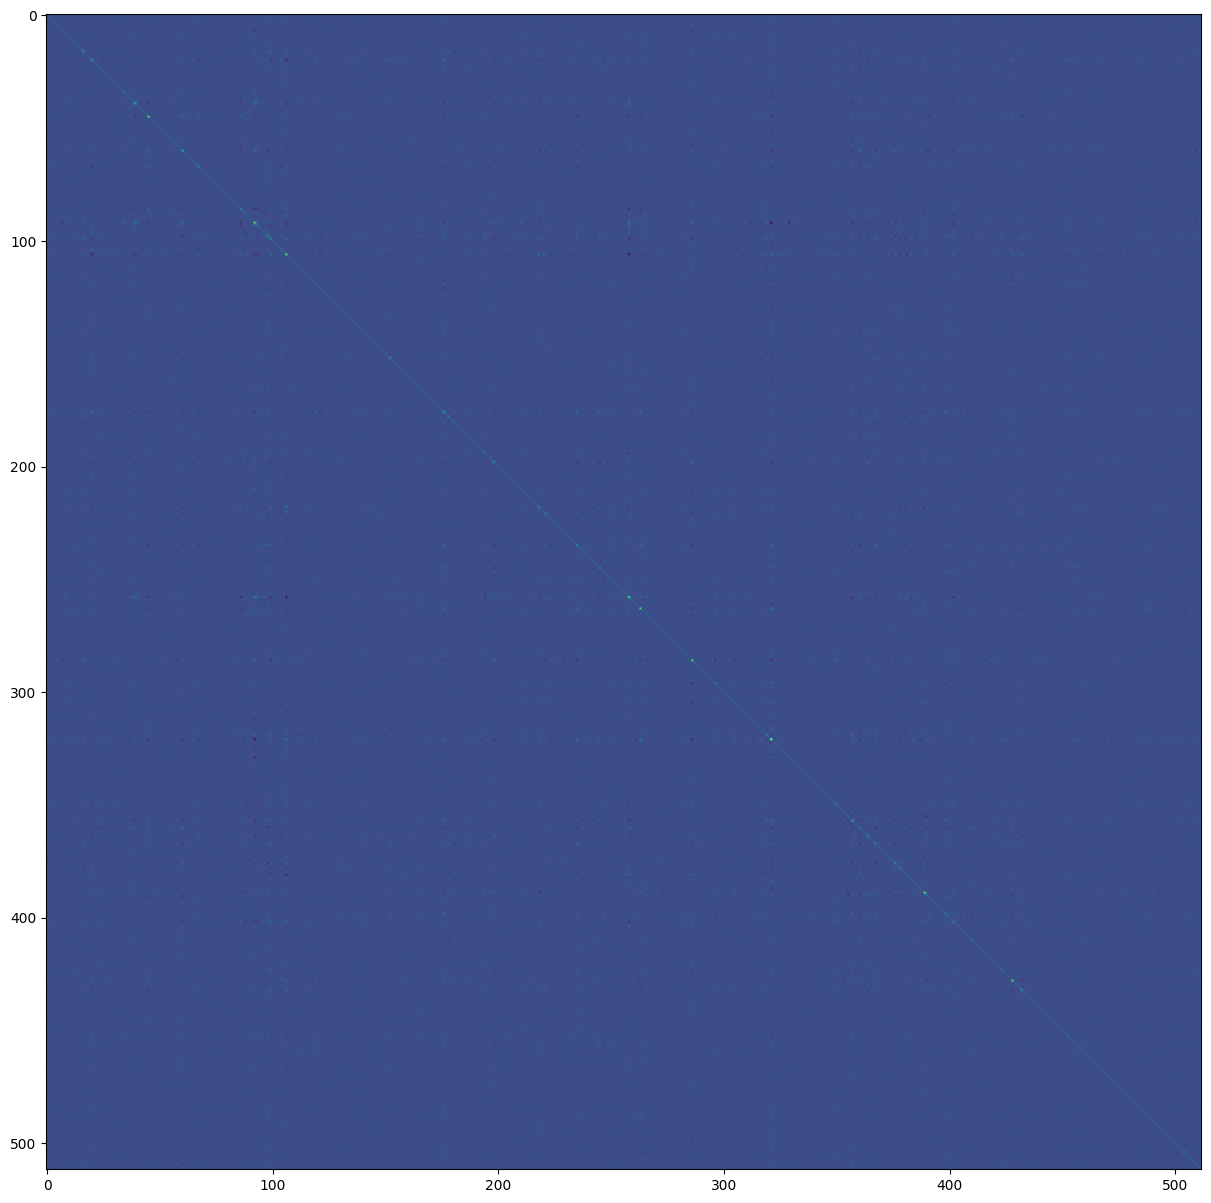

In [ ]:
# plot the image embedding covariance matrix
plt.figure(figsize=(15, 15))
plt.imshow(coco_emb_cov.cpu().numpy())

In [ ]:
diff = img_emb_cov.float() - torch.cov((img_embs_m.float() - img_embs_m.float().mean(0)).T)

In [ ]:
diff.abs().max()

tensor(5.9605e-08)

In [ ]:
img_embs_m.var(0)

tensor([0.0368, 0.0474, 0.0292, 0.0572, 0.0853, 0.0591, 0.0550, 0.0436, 0.1247, 0.0428, 0.0333, 0.0484, 0.1412, 0.0374, 0.0467, 0.0405, 0.1791, 0.0283, 0.0349, 0.0450, 0.2554, 0.0590, 0.0655, 0.0788, 0.0555, 0.0473, 0.0372, 0.0446, 0.0273, 0.0542, 0.0371, 0.0699, 0.0662, 0.0349, 0.1168, 0.0302, 0.0369, 0.0463, 0.0573,
        0.2927, 0.0599, 0.0429, 0.0564, 0.0457, 0.0685, 0.6083, 0.0756, 0.0274, 0.0498, 0.0453, 0.0520, 0.0537, 0.0296, 0.0353, 0.0632, 0.0430, 0.0994, 0.0406, 0.0589, 0.0426, 0.1659, 0.0661, 0.0838, 0.0665, 0.0413, 0.0439, 0.0868, 0.1710, 0.0498, 0.0621, 0.0422, 0.0421, 0.0522, 0.0649, 0.0303, 0.0537, 0.0663, 0.0587,
        0.0387, 0.0415, 0.0631, 0.0913, 0.0474, 0.0753, 0.0388, 0.0340, 0.1861, 0.0456, 0.1280, 0.0367, 0.0406, 0.0371, 0.9653, 0.1187, 0.0508, 0.0346, 0.0742, 0.0464, 0.1043, 0.1034, 0.0431, 0.0731, 0.0636, 0.0518, 0.1487, 0.0758, 0.3259, 0.0524, 0.0321, 0.0411, 0.0321, 0.0685, 0.0467, 0.0477, 0.0536, 0.0385, 0.0368,
        0.0316, 0.0360, 0.0905, 0.0328, 

# compute factors

In [ ]:
from utils.whitening import whitening_matrix, coloring_matrix

In [ ]:
W_whiten = whitening_matrix(coco_embs)

# Transform the data
embs_whitened = coco_embs @ W_whiten

In [ ]:
torch.cov(embs_whitened.T)

tensor([[ 1.0000e+00,  3.2497e-06, -6.0290e-06,  ..., -7.8076e-06, -1.4066e-06, -3.8984e-06],
        [ 3.2497e-06,  1.0000e+00, -3.7524e-07,  ..., -3.8543e-06, -9.1616e-07, -5.7687e-09],
        [-6.0290e-06, -3.7524e-07,  1.0000e+00,  ...,  2.4183e-06,  3.4905e-07,  5.6130e-07],
        ...,
        [-7.8064e-06, -3.8533e-06,  2.4191e-06,  ...,  1.0000e+00,  1.9780e-06,  2.2690e-06],
        [-1.4075e-06, -9.1655e-07,  3.4928e-07,  ...,  1.9780e-06,  1.0000e+00,  4.2216e-07],
        [-3.8990e-06, -6.9458e-09,  5.6390e-07,  ...,  2.2690e-06,  4.2216e-07,  1.0000e+00]])

In [ ]:
W_color = coloring_matrix(cov_emb)
colored = embs_whitened @ W_color

In [ ]:
torch.square(torch.cov(coco_embs.T) - cov_emb).mean()

tensor(0.0002)